# Fourier series

## Quick setup — imports and plotting defaults
Run this cell first

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import time
plt.rcParams.update({'figure.figsize': (7,4), 'image.cmap': 'viridis'})
from scipy.integrate import quad


## Continuous Fourier Series
### Periodic functions

Let $f(t)$ be an arbitrary periodic function with period $T$, that is, $f(t) = f(t+T)$.

In this case, $f(t)$ can be represented by an infinite series of sinusoids with harmonically related frequencies:

$f(t) \approx a_0 + \sum_{k=1}^{\infty} \left[ a_k \cos\left(\frac{2\pi k}{T}t\right) + b_k \sin\left(\frac{2\pi k}{T}t\right) \right]$

where $\omega_0 = 2\pi/T$ is called the fundamental frequency, and its multiples $2\omega_0, 3\omega_0, \dots$ are called harmonics.
Fourier series express $f(t)$ as a linear combination of the basis functions: $1, \cos(\omega_0 t), \sin(\omega_0 t), \cos(2\omega_0 t), \sin(2\omega_0 t), \dots$








The coefficients above are calculated as:

$a_0 = \frac{1}{T} \int_0^T f(t)\,dt$ 

$a_k = \frac{2}{T} \int_0^T f(t)\cos\left(\frac{2\pi k}{T}t\right)\,dt$

$b_k = \frac{2}{T} \int_0^T f(t)\sin\left(\frac{2\pi k}{T}t\right)\,dt$ 


The Fourier expansion can be written as

$f(t) \approx a_0 + \sum_{k=1}^{\infty} \left[ c_k \cos\left(\frac{2\pi k}{T}t + \theta_k\right) \right]$ 

where the coefficients are related by

$c_k = \sqrt{a_k^2 + b_k^2}$ 

$\theta_k = -\tan^{-1}\left(\frac{b_k}{a_k}\right)$ 


Terms $a_0, a_k,$ and $b_k$ are integrated between the limits $0$ and $T$. In fact, they should be computed by integrating over any full period. That is, they can be integrated between $-T/2$ and $T/2$, or in general between any $t_0$ and $t_0+T$.

The coefficients $a_k$ and $b_k$ depend on the chosen integration limits, although $c_k = \sqrt{a_k^2 + b_k^2}$ is constant.

For symmetric intervals ($-T/2$ and $T/2$,) and odd functions $a_0=a_k=0$. For symmetric intervals and even functions $b_k=0$.

In addition to the trigonometric forms, the Fourier series can also be expressed in complex notation:

$f(t) \approx a_0 + \sum_{k=1}^{\infty} \left[ C_k e^{ik\omega_0 t} + D_k e^{-ik\omega_0 t} \right] = \sum_{n=-\infty}^{\infty} C_n e^{in\omega_0 t}$ 

with $\omega_0 = 2\pi/T$, where

$C_k = \tfrac{1}{2}(a_k - ib_k) = \tfrac{2}{T} \int_0^T f(t) e^{-ik\omega_0 t} dt$ 

$D_k = \tfrac{1}{2}(a_k + ib_k) = \tfrac{2}{T} \int_0^T f(t) e^{ik\omega_0 t} dt$ 


### Non-periodic functions

Suppose we have a non-periodic signal $f(t)$, and we want to describe a portion of it with a continuous Fourier series, for example between $t_a$ and $t_b$.

From $f(t)$ we construct a periodic signal $g(t)$ by simply repeating that segment. The period of the new signal is $T = t_b - t_a$. The new periodic signal $g(t)$ can be analyzed with the continuous Fourier series. The results are only valid in the interval $[t_a, t_b]$.

<table><tr><td align="center">
  <img src="./img/fourier_fig2.jpg" alt="fig1" width="500">
</td></tr></table>



## Worked examples

**Example A**: Plot $f(x)=|x|$ for $x \in [-\pi,\pi]$ and the associated Fourier Series for different number of harmonics, to see when it converges.


It's an even function, so $b_n = 0$.

$$
a_0 = \frac{2}{\pi} \int_0^\pi x \, \mathrm{d}x = \frac{x^2}{\pi} \Big|_0^\pi = \pi
$$

$$
a_n = \frac{2}{\pi} \int_0^\pi x \, \cos n x \, \mathrm{d}x 
= \frac{2}{\pi} \left( \frac{x}{n} \sin n x + \frac{1}{n^2} \cos n x\right) \Big|_0^\pi = 2 \frac{ ((-1)^n -1)}{\pi n^2}
$$

If $n$ is odd, $a_n = 0$, so

$$
a_k = \frac{-4}{\pi (2k+1)^2}, \; k = 0, 1, 2 \in \mathcal{N}
$$

And:

$$
S(x) = \frac{\pi}{2} - \frac{4}{\pi} \sum_k \frac{1}{(2k+1)^2} \cos (2k+1) x
$$

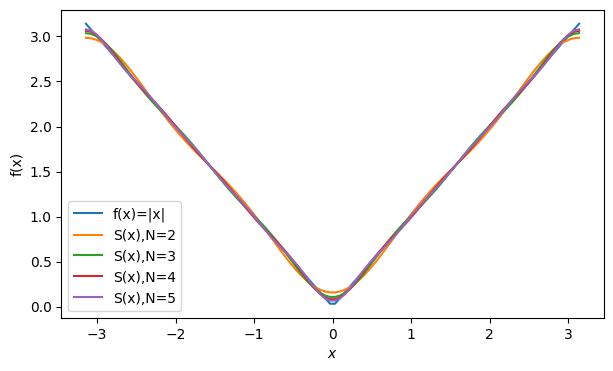

In [ ]:
## define the Fourier series as a class with different number of harmonics

class sx:
    def __init__(self,N=2): # we define a class that creates a Fourier series with N harmonics (N=2 by default)
        self.N = N
    
    def fun(self,x): 
        ss = np.pi/2
        for k in range(0, self.N):
            ss = ss + -4*np.cos((2*k+1)*x)/(np.pi*(2*k+1)*(2*k+1))
        return  ss

## get a tuple (plot x axis)
xs   = np.linspace(-np.pi, np.pi, 100)
## define the figure
fig = plt.figure()
ax = plt.gca()
ax.set_xlabel('$x$'); ax.set_ylabel('f(x)')
## finally plot f(x) and some series
ax.plot(xs, abs(xs),label = 'f(x)=|x|')
mysx = {}
for N in range(2,6):
    mysx[N] = sx(N)
    ax.plot(xs, mysx[N].fun(xs), label = 'S(x),N='+str(N))
a=ax.legend()

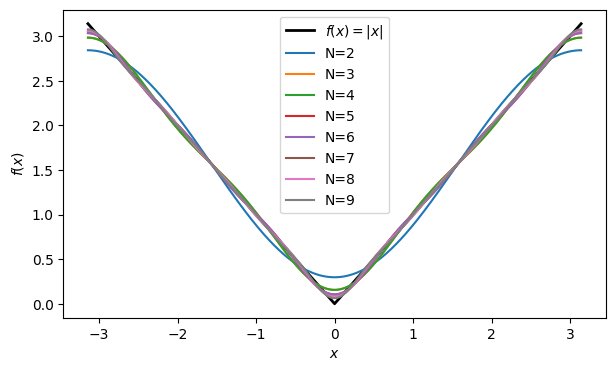

In [ ]:
## ALTERNATIVE USING NUMERICAL INTEGRAL (much slower than the previous one)

# Fourier coefficients
def a0():
    val, _ = quad(lambda x: abs(x), -np.pi, np.pi)
    return val/np.pi

def an(n):
    val, _ = quad(lambda x: abs(x)*np.cos(n*x), -np.pi, np.pi)
    return val/np.pi

# Fourier series approximation with N terms
def fourier_series(x, N):
    s = a0()/2
    for n in range(1, N+1):
        s += an(n) * np.cos(n*x)
    return s

# x grid
xs = np.linspace(-np.pi, np.pi, 4000)

# plot
fig, ax = plt.subplots()
ax.plot(xs, abs(xs), label='$f(x)=|x|$', lw=2, color='black')

for N in range(2,10):
    ys = [fourier_series(x, N) for x in xs]
    ax.plot(xs, ys, label=f'N={N}')

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.legend()
plt.show()


**Example B (for you to do):** We define a piecewise function $f(x)$ on the interval $[5,10]$ as follows:

$f(x) = 
\begin{cases}
x - 5,~\mathrm{for}~5 \leq x < 7 \\
2,~ \mathrm{for}~7 \leq x < 9 \\
10 - x,~\mathrm{for}~ 9 \leq x < 10
\end{cases}$

The function is extended periodically with period $T=5$.

Plot $f(x)$ and its periodic extension on a larger interval, for example $[-5,15]$.
Compute Fourier coefficients, given by:

$a_0 = \frac{1}{T} \int_{5}^{10} f(x), dx$

$a_k = \frac{2}{T} \int_{5}^{10} f(x)\cos(k\omega_0 x), dx$

$b_k = \frac{2}{T} \int_{5}^{10} f(x)\sin(k\omega_0 x), dx$

Build the partial sums for $N=5$, $N=20$ and $N=50$

$S_N(x) = a_0 + \sum_{k=1}^{N} \Big[ a_k \cos(k \omega_0 x) + b_k \sin(k \omega_0 x) \Big]$

and plot them together with the original function on the interval $[0,15]$. Compute the Fourier coefficients for up to $N=50$ terms and plot the decay of $|a_k|$ and $|b_k|$ as a function of $k$.


C:\Users\alrog\AppData\Local\Temp\ipykernel_20732\2039682281.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val, _ = quad(lambda x: f(x)*np.sin(n*x), 5, 10)


TypeError: can only concatenate list (not "int") to list

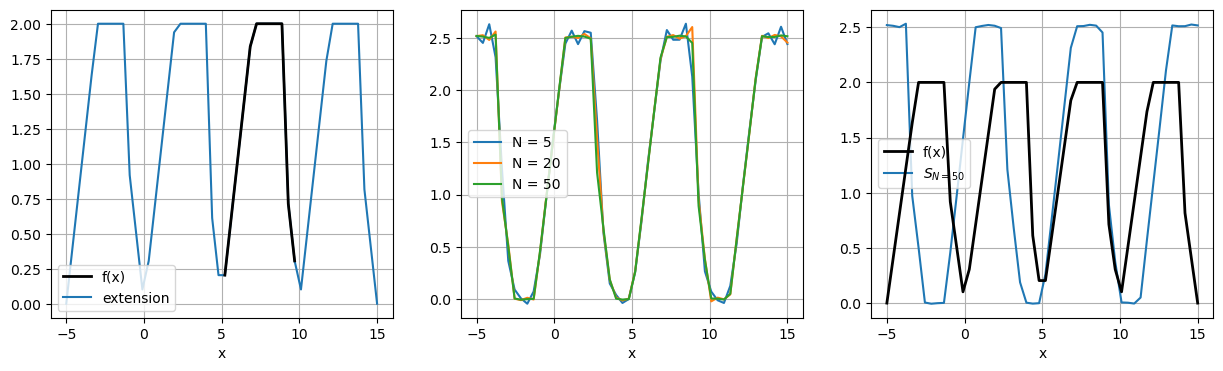

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x): # domain [5,10]

    if 5 <= x < 7:
        return x-5
    elif 7 <= x < 9:
        return 2
    elif 9 <= x < 10:
        return 10-x
    else:
        return None

def f_extended(x):
        
        x = 5 + x%5
        return f(x)

f = np.vectorize(f)

def a0():
    val, _ = quad(f, 5, 10)
    return val/5

def an(n):
    val, _ = quad(lambda x: f(x)*np.cos(n*x), 5, 10)
    return val*2/5

def bn(n):
    val, _ = quad(lambda x: f(x)*np.sin(n*x), 5, 10)
    return val*2/5

def fourier_series(x, N):
    
    s = a0()
    for n in range(1, N+1):
        s += an(n)*np.cos(n*x) + bn(n)*np.sin(n*x)
    return s

xs = np.linspace(-5,15)

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1, 3, 1); ax2 = fig.add_subplot(1,3,2); ax3 = fig.add_subplot(1,3,3)

ys = [f(x) for x in xs]
ys_extended = [f_extended(x) for x in xs]

ax1.plot(xs, ys,color='black',linewidth=2, zorder=1000,label='f(x)')
ax1.plot(xs,ys_extended, label='extension')

ax1.legend()
ax1.grid()

# Fourier series

N = [5, 20, 50]
SN = [fourier_series(xs, n) for n in N]

for i in range(len(N)):
    ax2.plot(xs, SN[i], label=f'N = {N[i]}')

ax2.legend()
ax2.grid()

# plot with the original function

ax3.plot(xs, ys_extended, color='black', linewidth=2, zorder=100, label='f(x)')
ax3.plot(xs, SN[-1], label = '$S_{N=50}$')

ax3.legend(loc='best')
ax3.grid()

ax1.set_xlabel('x'); ax2.set_xlabel('x'); ax3.set_xlabel('x')

#### ak y bk

ak = [an(n) for n in range(1,N+1)]
bk = [bn(n) for n in range(1,N+1)]

plt.plot(range(N+1),ak, '-o')
plt.plot(range(N+1), bk, '-o')

## Exercises (1)

**Exercise 1:** Consider the following periodic function ($T=3$):

$f(t) =
\begin{cases}
2t + 4 & -1 \leq t < 2 \\
f(t) = f(t+T) & \text{otherwise}
\end{cases}$

Plot this function, compute $a_0, a_1$, and $b_1$ of the Fourier series.

**Exercise 2:** Consider the following periodic function ($T=5$):

$f(t) =
\begin{cases}
t^2 & 0 \leq t < 5 \\
f(t) = f(t+T) & \text{otherwise}
\end{cases}$

Plot this function, compute $a_0, a_1$, and $a_2$ of the Fourier series.

**Exercise 3:** Consider the following periodic function ($T=2$):

$f(t) =
\begin{cases}
-0.5 & -1 \leq t < 0 \\
0.5 & 0 \leq t < 1 \\
f(t) = f(t+T) & \text{otherwise}
\end{cases}$

Approximate this function with the continuous Fourier series using $a_0, b_1,$ and $b_2$.



**Exercise 4:** Approximate the wave illustrated in the figure by the continuous Fourier series using the first $k=8$ terms.

<table><tr><td align="center">
  <img src="./img/fourier_fig1.jpg" alt="fig1" width="500">
</td></tr></table>



**Exercise 5:** We define the non-periodic function

$f(t) = t^2$

Approximate this function in the interval $(t_a=1, t_b=3)$ with the continuous Fourier series using the first $k=8$ terms.


## Discrete Fourier Transform (DFT)

Let $f(t)$ be a continuous function of time. To analyze it with digital tools, we first represent it by a finite set of $N$ discrete, equally spaced samples:

- The sample points are indexed by $n = 0, 1, \dots, N-1$.
- The sampling interval is $\Delta t$, so that $t_n = n \Delta t$.
- The sampled values are $y_n = f(t_n)$.

Because the data set is finite, we usually make the assumption that the signal is **periodic** with period $N \Delta t$. This assumption ensures that the Fourier expansion is well defined on the discrete samples.




The Fourier coefficients are obtained by

$$
F_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \, e^{-i \frac{2\pi k n}{N}} \quad \text{for } k = 0, 1, \dots, N-1
$$

where $F_k$ represents the amplitude of the frequency component at frequency

$$
f_k = \frac{k}{N \Delta t}.
$$


In many contexts, the DFT is defined without the factor $1/N$:

$$
C_k = \sum_{n=0}^{N-1} y_n \, e^{-i \frac{2\pi k n}{N}}.
$$

The two conventions are related by

$$
F_k = \frac{C_k}{N}.
$$

This distinction is important when comparing formulas across books or software libraries.




For instance, consider a sequence of $N = 4$ samples:

$$
y = [1, \; 0, \; -1, \; 0].
$$

We compute the DTF coefficients

$$
C_k = \sum_{n=0}^{N-1} y_n \, e^{-i \frac{2\pi k n}{N}}, \quad k = 0, 1, 2, 3.
$$


$$
C_0 = \sum_{n=0}^{3} y_n \cdot e^{-i \frac{2\pi \cdot 0 \cdot n}{4}}
= (1)(1) + (0)(1) + (-1)(1) + (0)(1) = 0.
$$

$$
C_1 = \sum_{n=0}^{3} y_n \cdot e^{-i \frac{2\pi \cdot 1 \cdot n}{4}}.
$$

- For $n=0$: $(1)(1) = 1$  
- For $n=1$: $(0)(e^{-i \pi/2}) = 0$  
- For $n=2$: $(-1)(e^{-i \pi}) = (-1)(-1) = 1$  
- For $n=3$: $(0)(e^{-i 3\pi/2}) = 0$

So

$$
C_1 = 1 + 0 + 1 + 0 = 2.
$$

$$
C_2 = \sum_{n=0}^{3} y_n \cdot e^{-i \frac{2\pi \cdot 2 \cdot n}{4}}.
$$

- For $n=0$: $(1)(1) = 1$  
- For $n=1$: $(0)(e^{-i \pi}) = 0$  
- For $n=2$: $(-1)(e^{-i 2\pi}) = (-1)(1) = -1$  
- For $n=3$: $(0)(e^{-i 3\pi}) = 0$

So

$$
C_2 = 1 + 0 - 1 + 0 = 0.
$$


$$
C_3 = \sum_{n=0}^{3} y_n \cdot e^{-i \frac{2\pi \cdot 3 \cdot n}{4}}.
$$

- For $n=0$: $(1)(1) = 1$  
- For $n=1$: $(0)(e^{-i 3\pi/2}) = 0$  
- For $n=2$: $(-1)(e^{-i 3\pi}) = (-1)(-1) = 1$  
- For $n=3$: $(0)(e^{-i 9\pi/2}) = 0$

So

$$
C_3 = 1 + 0 + 1 + 0 = 2.
$$

The DFT coefficients are

$$
C = [\, C_0, C_1, C_2, C_3 \,] = [\, 0, \; 2, \; 0, \; 2 \,].
$$

This tells us the sequence $[1, 0, -1, 0]$ has contributions only at frequencies $k=1$ and $k=3$ (which is the symmetric negative frequency).



### Inverse Discrete Fourier Transform

From the coefficients $C_k$ we can reconstruct the original signal values $y_n$ via the **inverse DFT**:

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} C_k \, e^{i \frac{2\pi k n}{N}}.
$$

This shows that the DFT is a reversible operation: no information is lost as long as we keep all $N$ coefficients.


### Fast Fourier Transform (FFT)

Directly computing the DFT requires $N^2$ operations. For large $N$, this becomes computationally expensive.  

The **Fast Fourier Transform (FFT)** is a family of algorithms that computes the same result as the DFT, but with only $O(N \log N)$ operations. This efficiency gain is enormous and explains why Fourier analysis is practical in modern applications.

In Python, FFT algorithms are implemented in packages such as **NumPy** (`numpy.fft`) and **SciPy**.



### Power Spectrum

One way to analyze a signal is through its **power spectrum**, which shows how the energy of the signal is distributed among frequencies. The power at frequency $f_k$ is defined as

$$
P_k = |F_k|^2.
$$

Plotting $P_k$ versus $f_k$ reveals the dominant frequency components of the signal.  

Sometimes the **total power** is also written as

$$
P_{\text{total}} = \sum_{k=0}^{N-1} |F_k|^2,
$$

which gives a single number representing the energy content of the entire signal.



If the chosen sampling window (time interval $T = N \Delta t$) does not contain an integer number of oscillation periods of the signal, the frequency components do not align perfectly with the DFT frequency bins.  

As a result, the Fourier transform may show spurious frequencies around the true peak. This effect is called **spectral leakage**.  

To reduce leakage, one can:
- Choose $T$ so that it contains an integer number of cycles of the signal, if possible.
- Apply a **window function** (e.g. Hann, Hamming, Blackman) to taper the edges of the data before computing the DFT.

## Worked examples

**Example A** Let us consider a signal composed of the sum of two cosine waves with different frequencies:

$$
y[n] = \cos\left(\frac{2\pi \cdot 2}{N} n\right) + 0.5 \cos\left(\frac{2\pi \cdot 3}{N} n\right), \quad n = 0, \dots, N-1.
$$

- The first cosine has frequency bin $k=2$.
- The second cosine has frequency bin $k=3$ and half the amplitude.

When we compute the DFT, we should see **two peaks** in the spectrum at $k=2$ and $k=3$ (and symmetrically at $k=N-2$ and $k=N-3$ for the negative frequencies).

Note: here we wrote the signal as a function of the sample index $n$. If we had a real sampling interval $\Delta t$, then the corresponding time would be $t_n = n \Delta t$, and the argument of the cosine would look like $2\pi f t_n$. In this simplified example, $\Delta t=1$ so the "time axis" is implicit in the index $n$.

This is a realistic situation: real-world signals (audio, vibrations, etc.) often consist of multiple frequency components added together. The DFT helps us identify those components.


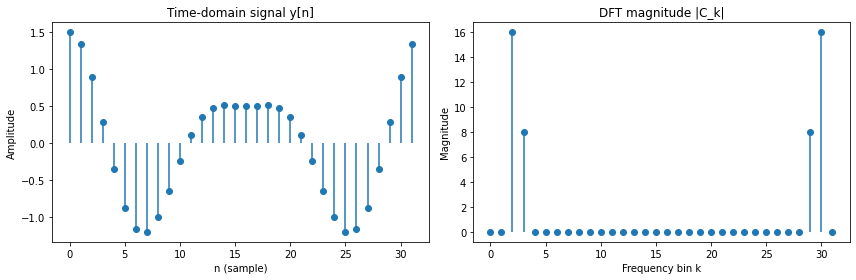

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 32
n = np.arange(N)

# Construct signal: mixture of two cosines
y = np.cos(2 * np.pi * 2 * n / N) + 0.5 * np.cos(2 * np.pi * 3 * n / N)

# Compute DFT with numpy
C = np.fft.fft(y)
freqs = np.arange(N)  # frequency bins

# Plot the time-domain signal
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.stem(n, y, basefmt=" ")
plt.title("Time-domain signal y[n]")
plt.xlabel("n (sample)")
plt.ylabel("Amplitude")

# Plot the frequency-domain magnitude
plt.subplot(1, 2, 2)
plt.stem(freqs, np.abs(C), basefmt=" ")
plt.title("DFT magnitude |C_k|")
plt.xlabel("Frequency bin k")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


**Example B (for you to do)**: Given the function

$f(t) = \cos(2\pi f_1 t + \phi) + 0.5 \sin(2\pi f_2 t)$

compute its discrete Fourier transform using $N=2000$ samples in the interval $0 \leq t < 2$ s, with

$f_1 = 30$ Hz

$f_2 = 80$ Hz

$\phi = \pi/4$

Plot the real part and imaginary part of the Fourier coefficients versus frequency.

Plot the power spectrum $P_k = |F_k|^2$ versus frequency.

Identify the frequencies where the peaks appear and explain how they relate to $f_1$ and $f_2$.

## Exercises (2)

**Exercise 6:** Given the function

$f(t) = \cos(2\pi f t)$

Obtain the discrete Fourier transform using $N=10000$ samples in the interval $0 \leq t < 5s$, with $f = 250$ Hz. Plot the real part versus frequency.

**Exercise 7:** Given the function

$f(t) = \sin(2\pi f_1 t) + 2\cos(2\pi f_2 t)$

Obtain the discrete Fourier transform using $N=1000$ samples in the interval $0 \leq t < 5s$, with $f_1 = 10$ Hz and $f_2 = 50$ Hz. Plot the real part, the imaginary part, and the power versus frequency.

**Exercise 8:** The file [piano.txt](https://www.dropbox.com/scl/fi/495ralmki84l5o8ndg8ai/piano.txt?rlkey=k797bbgsxd25q63zhtlsi681h&dl=1)
 contains data representing the waveform of a single note played on a piano, sampled at 44100 samples per second.

Read the information in piano.txt and plot the signal versus time.

Obtain the discrete Fourier transform of the signal and plot its power spectrum, adjusting the horizontal axis so that the frequency can be read.

From the measured frequency, determine which note it is.